In [22]:
# Install & import libraries
!pip install wordcloud


In [24]:
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud


In [25]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [26]:
#Load Dataset
df = pd.read_csv("Tweets.csv")
df = df[['text', 'airline_sentiment']]


In [27]:
#Text Cleaning
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"#\w+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    return text


In [28]:
df['cleaned_text'] = df['text'].apply(clean_text)


In [29]:
#Tokenization & Stopword Removal
def preprocess(text):
    tokens = nltk.word_tokenize(text)
    tokens = [w for w in tokens if w not in stop_words]
    return " ".join(tokens)


In [30]:
df['processed_text'] = df['cleaned_text'].apply(preprocess)

In [31]:
#TF-IDF Computation
tfidf = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf.fit_transform(df['processed_text'])

tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=tfidf.get_feature_names_out()
)


In [32]:
#Negative Sentiment Analysis
negative_df = df[df['airline_sentiment'] == 'negative']
negative_tfidf = tfidf.transform(negative_df['processed_text'])

negative_tfidf_df = pd.DataFrame(
    negative_tfidf.toarray(),
    columns=tfidf.get_feature_names_out()
)


In [33]:
top_terms = negative_tfidf_df.mean().sort_values(ascending=False).head(10)


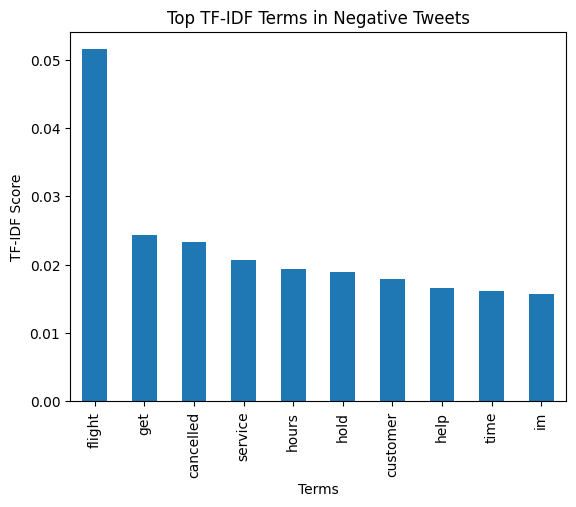

In [34]:
#Bar chart
plt.figure()
top_terms.plot(kind='bar')
plt.title("Top TF-IDF Terms in Negative Tweets")
plt.xlabel("Terms")
plt.ylabel("TF-IDF Score")
plt.show()


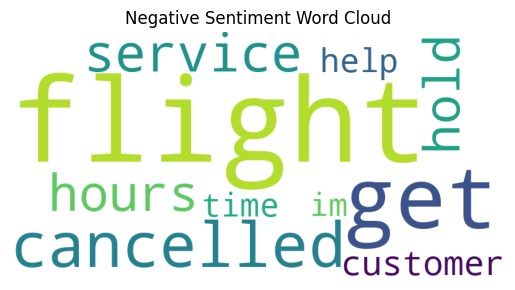

In [35]:
#Word Cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate_from_frequencies(top_terms)

plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Negative Sentiment Word Cloud")
plt.show()
